In [2]:
import pandas as pd
import numpy as np

In [3]:
nyc_data=pd.read_csv('AB_NYC_2019.csv')
print(nyc_data.shape)
nyc_data.head()


(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
nyc_data.host_id.value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

In [5]:
nyc_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
nyc_data.drop(['id', 'name', 'host_id', 'host_name','neighbourhood'],axis=1, inplace=True )

In [7]:
def inspect_data(data):
    return pd.DataFrame({'Type': data.dtypes, 'Levels': data.apply(lambda x: x.unique().shape[0],axis=0), 'Labels': data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(nyc_data)

,Type,Levels,Labels
neighbourhood_group,object,5,['Brooklyn' 'Manhattan' 'Queens' 'Staten Islan...
latitude,float64,19048,[40.647490000000005 40.75362 40.80902000000000...
longitude,float64,14718,[-73.97237 -73.98376999999999 -73.9419 ... -73...
room_type,object,3,['Private room' 'Entire home/apt' 'Shared room']
price,int64,674,[149 225 150 89 80 200 60 79 135 85 120 140 21...
minimum_nights,int64,109,[1 3 10 45 2 5 4 90 7 14 60 29 30 180 9 31 6 1...
number_of_reviews,int64,394,[9 45 0 270 74 49 430 118 160 53 188 167 113 2...
last_review,object,1765,['2018-10-19' '2019-05-21' nan ... '2017-12-23...
reviews_per_month,float64,938,[0.21 0.38 nan 4.64 0.1 0.59 0.4 3.47 0.99 1.3...
calculated_host_listings_count,int64,47,[6 2 1 4 3 5 7 13 28 11 8 9 52 18 15 19 10 39 ...


In [8]:
nyc_data.isnull().sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
nyc_data['last_review']= pd.to_datetime(nyc_data['last_review'])

In [10]:
nyc_data.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [11]:
nyc_data['last_review']=max(nyc_data['last_review'])-nyc_data['last_review']

In [12]:
nyc_data['last_review'].fillna(max(nyc_data['last_review']), inplace=True)

In [13]:
nyc_data['last_review']= nyc_data['last_review'].dt.days

In [14]:
nyc_data.isnull().sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
nyc_data.reviews_per_month.fillna(0, inplace=True)
nyc_data.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [16]:
nyc_data=pd.get_dummies(nyc_data)
nyc_data.shape

(48895, 17)

In [17]:
nyc_data.availability_365.value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

In [18]:
#Decoupling target
y=nyc_data['availability_365']
X=nyc_data[nyc_data.columns.difference(['availability_365'])]

In [19]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, stratify=y)

In [20]:
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(34226, 16) (34226,) (14669, 16) (14669,)


In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.15424532786733902
0.15965066196492217


In [22]:
from sklearn.metrics import mean_squared_error
print('Train MSE: ', mean_squared_error(y_train, lr.predict(X_train)) )
print('Test MSE: ', mean_squared_error(y_test, lr.predict(X_test)) )

Train MSE:  14648.85218625913
Test MSE:  14565.374175921492


# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=7)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

print(mean_squared_error(y_train, dt.predict(X_train)))
print(mean_squared_error(y_test, dt.predict(X_test)))

0.36178625526640773
0.32680775008783336
11054.149764572456
11668.120112081135


# Decision Tree tuning

In [31]:
from sklearn.model_selection import RandomizedSearchCV
dt=DecisionTreeRegressor()
grid_params={'max_depth':np.arange(3,15,1),
            'max_leaf_nodes': np.arange(5,30,1),
             'min_samples_split': np.arange(0.001,0.1,0.001),
            'min_weight_fraction_leaf':np.arange(0.01,0.25,0.005)}
rsearch_dt=RandomizedSearchCV(estimator=dt, param_distributions=grid_params, n_iter=500, n_jobs=-1)
rsearch_dt.fit(X_train, y_train)
print('Best tree: ',rsearch_dt.best_estimator_)
print('Best sore: ', rsearch_dt.best_score_)
print('Test score: ', rsearch_dt.score(X_test, y_test))
print('Train error: ', mean_squared_error(y_train, rsearch_dt.predict(X_train)))
print('Test error: ', mean_squared_error(y_test, rsearch_dt.predict(X_test)))

Best tree:  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=27,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1,
                      min_samples_split=0.009000000000000001,
                      min_weight_fraction_leaf=0.019999999999999997,
                      presort='deprecated', random_state=None, splitter='best')
Best sore:  0.30779935943099107
Test score:  0.32754203445256347
Train error:  11848.72117155323
Test error:  11655.39311148775


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, max_depth=10, max_features=7)
rf.fit(X_train, y_train)
print('Train R2 =', rf.score(X_train, y_train))
print('Train R2 =', rf.score(X_test, y_test))

print("Train - MSE")
print(mean_squared_error(y_train,rf.predict(X_train)))
print("Test - MSE")
print(mean_squared_error(y_test,rf.predict(X_test)))

Train R2 = 0.47388666290720405
Train R2 = 0.39618955196615546
Train - MSE
9112.520169540388
Test - MSE
10465.558439669572


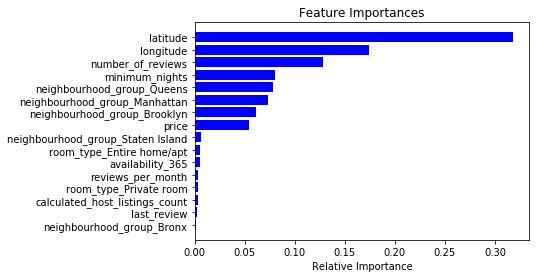

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
features = nyc_data.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Random forest tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn import tree
rf=RandomForestRegressor(max_samples=0.5)
grid_params={'n_estimators' : [25,50,75,100],
              'max_features' : [5,7,9,11,13],
             'min_samples_split': np.arange(0.001,0.1,0.001),
             'max_depth':np.arange(5,15,1)}
rsearch_rf=RandomizedSearchCV(estimator=rf, param_distributions=grid_params, n_iter=500, n_jobs=-1)
rsearch_rf.fit(X_train, y_train)
print('Best tree: ',rsearch_rf.best_estimator_)
print('Best sore: ', rsearch_rf.best_score_)
print('Test score: ', rsearch_rf.score(X_test, y_test))
print('Train error: ', mean_squared_error(y_train, rsearch_rf.predict(X_train)))
print('Test error: ', mean_squared_error(y_test, rsearch_rf.predict(X_test)))


Best tree:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features=5, max_leaf_nodes=None,
                      max_samples=0.5, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.001, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best sore:  0.38530466327816043
Test score:  0.40213489222094634
Train error:  9190.017458691234
Test error:  10362.510693339838


# Ada Boost

In [29]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
ada_boost=AdaBoostRegressor(n_estimators=50, base_estimator=DecisionTreeRegressor(max_depth=10))
ada_boost.fit(X_train, y_train)
print( 'Train score: ',ada_boost.score(X_train, y_train))
print( 'Test score: ',ada_boost.score(X_test, y_test))

print('Train MSE: ',mean_squared_error(y_train, ada_boost.predict(X_train)))
print('Test MSE: ',mean_squared_error(y_test, ada_boost.predict(X_test)))

Train score:  0.09696004865845753
Test score:  0.04295638858503503
Train MSE:  15641.059046273804
Test MSE:  16587.98034580269


# Ada Boost Tuning

In [30]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={'base_estimator' : [DecisionTreeRegressor(max_depth=3),DecisionTreeRegressor(max_depth=7),DecisionTreeRegressor(max_depth=15)],
            'n_estimators' : [10,20,30,40,50],
              'learning_rate' : [0.1,0.5,1,2,5,10]}
rsearch_ada=RandomizedSearchCV(estimator=AdaBoostRegressor(),param_distributions=param_grid,n_jobs=-1, n_iter=50)
rsearch_ada.fit(X_train, y_train)
print(rsearch_ada.best_estimator_)
print('Train score: ',rsearch_ada.best_score_)
print('Test score : ', rsearch_ada.score(X_test, y_test))

print('Train MSE: ', mean_squared_error(y_train, rsearch_ada.predict(X_train)))
print('Test MSE: ', mean_squared_error(y_test, rsearch_ada.predict(X_test)))


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=15,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                 

# Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
g_boost=GradientBoostingRegressor(n_estimators=200, max_depth=5)
g_boost.fit(X_train, y_train)

print('Train r2: ',g_boost.score(X_train, y_train))
print('Test r2: ',g_boost.score(X_test, y_test))

print('Train MSE: ', mean_squared_error(y_train, g_boost.predict(X_train)))
print('Test MSE: ', mean_squared_error(y_test, g_boost.predict(X_test)))

Train r2:  0.4918483039796536
Test r2:  0.40898398823580173
Train MSE:  8801.416449085049
Test MSE:  10243.798579570055


# Gradient Boosting Tuning

In [32]:
param_grid = {'n_estimators' : [50,100, 150, 200, 250],
              'max_features' : [5,7,9,11,13],
              'learning_rate' : [0.1,0.5,1,2,5,10],
             'min_samples_split': np.arange(0.001,0.1,0.001),
             'max_depth':np.arange(5,15,1)}

rsearch_gb = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=param_grid,n_iter=50, n_jobs=-1)
rsearch_gb.fit(X_train, y_train)
print(rsearch_gb.best_estimator_)
print('Train R2 =',rsearch_gb.best_score_)
print('Test R2 =',rsearch_gb.score(X_test, y_test))

print("Train - MSE")
print(mean_squared_error(y_train,rsearch_gb.predict(X_train)))
print("Test - MSE")
print(mean_squared_error(y_test,rsearch_gb.predict(X_test)))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:788: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=11, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=0.004,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
Train R2 = 0.40558163330930597
Test R2 = 0.4106627658637848
Train - MSE
7627.304588813888
Test - MSE
10214.701127828243
